## Exercise 1

In [8]:
import numpy as np
in_dir = "data/"
txt_name = "irisdata.txt"
iris_data = np.loadtxt(in_dir + txt_name, comments="%")
# x is a matrix with 50 rows and 4 columns
x = iris_data[0:50, 0:4]

In [9]:
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

Number of features: 4 and number of observations: 50


## Exercise 2

In [10]:
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]

In [11]:
# Use ddof = 1 to make an unbiased estimate
var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_w = pet_w.var(ddof=1)

print(f"Variance of sepal length: {var_sep_l}")
print(f"Variance of sepal width: {var_sep_w}")
print(f"Variance of petal length: {var_pet_l}")
print(f"Variance of petal width: {var_pet_w}")

Variance of sepal length: 0.12424897959183677
Variance of sepal width: 0.1436897959183674
Variance of petal length: 0.030159183673469384
Variance of petal width: 0.01110612244897959


## Exercise 3

In [12]:

co_var_sep_l_sep_w = 1 / (n_obs - 1) * np.sum((sep_l - sep_l.mean()) * (sep_w - sep_w.mean()))
print(f"Covariance between sepal length and sepal width: {co_var_sep_l_sep_w}")
co_var_sep_l_pet_l = np.cov(sep_l, pet_l, ddof=1)[0, 1]
print(f"Covariance between sepal length and petal length: {co_var_sep_l_pet_l}")


Covariance between sepal length and sepal width: 0.09921632653061223
Covariance between sepal length and petal length: 0.016355102040816326


## Exercise 4

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<Figure size 640x480 with 0 Axes>

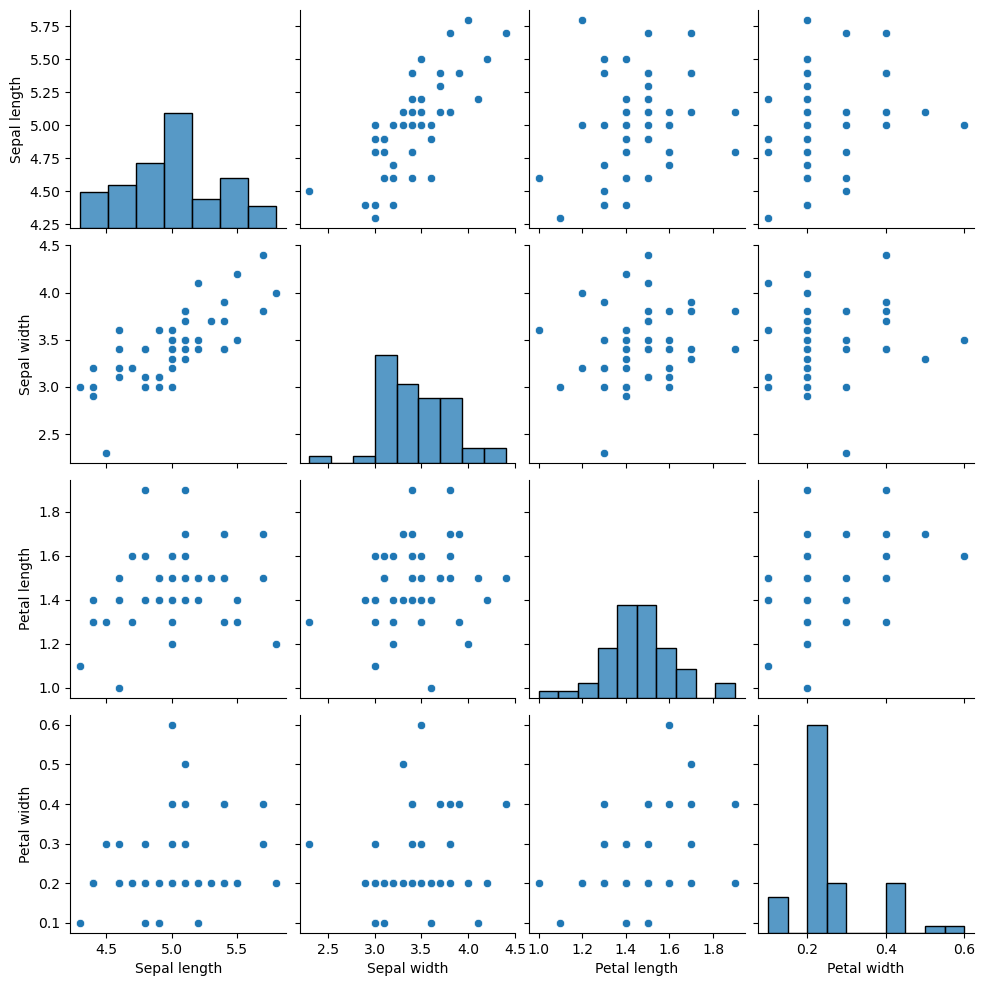

In [14]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=['Sepal length', 'Sepal width',
							 'Petal length', 'Petal width'])
sns.pairplot(d)
plt.show()

## Exercise 5

In [16]:
mn = np.mean(x, axis=0)
data = x - mn
cov = 1 / n_obs * data.T @ data
print(cov)

[[0.121764 0.097232 0.016028 0.010124]
 [0.097232 0.140816 0.011464 0.009112]
 [0.016028 0.011464 0.029556 0.005948]
 [0.010124 0.009112 0.005948 0.010884]]


## Exercise 6

In [19]:
values, vectors = np.linalg.eig(cov) # Here c_x is your covariance matrix.
print(values)
print(vectors)

[0.23172658 0.03618036 0.02626047 0.0088526 ]
[[ 0.6690784   0.59788401  0.43996277 -0.03607712]
 [ 0.73414783 -0.62067342 -0.27460747 -0.01955027]
 [ 0.0965439   0.49005559 -0.8324495  -0.23990129]
 [ 0.06356359  0.13093791 -0.19506751  0.96992969]]


## Exercise 7

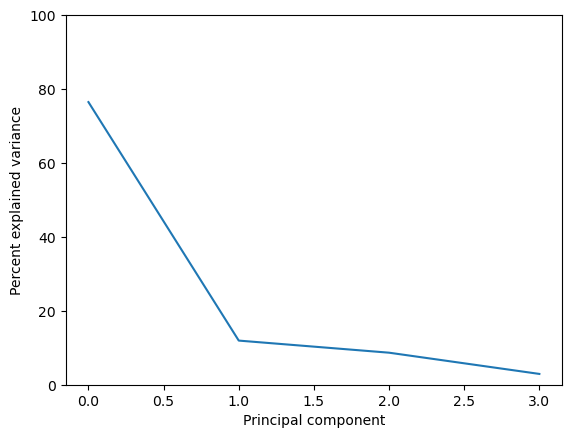

In [20]:
v_norm = values / values.sum() * 100
plt.plot(v_norm)
plt.xlabel('Principal component')
plt.ylabel("Percent explained variance")
plt.ylim([0, 100])

plt.show()

## Exercise 8

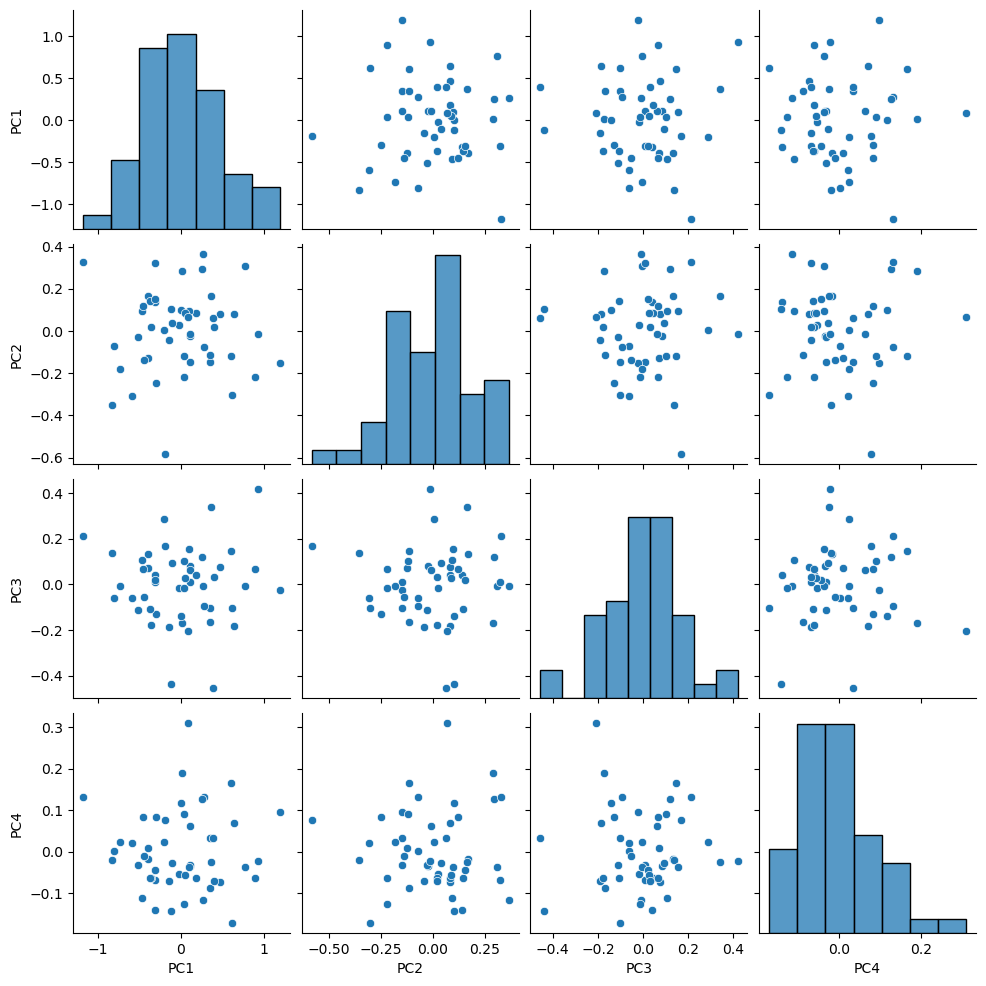

In [26]:
pc_proj = vectors.T.dot(data.T)

sns.pairplot(pd.DataFrame(pc_proj.T, columns=['PC1', 'PC2','PC3', 'PC4']))

## Exercise 9

In [27]:
from sklearn import decomposition

In [31]:
x = iris_data[0:50, 0:4]

pca = decomposition.PCA()
pca.fit(x)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_

data_transform = pca.transform(x)

print(values_pca)
print(exp_var_ratio)
print(vectors_pca.T)
print(data_transform)


[0.23645569 0.03691873 0.0267964  0.00903326]
[0.7647237  0.11939924 0.0866625  0.02921456]
[[ 0.6690784  -0.59788401 -0.43996277 -0.03607712]
 [ 0.73414783  0.62067342  0.27460747 -0.01955027]
 [ 0.0965439  -0.49005559  0.8324495  -0.23990129]
 [ 0.06356359 -0.13093791  0.19506751  0.96992969]]
[[ 0.10684237  0.02489398 -0.08216974 -0.03454175]
 [-0.39404723 -0.16586593 -0.13148092 -0.01755119]
 [-0.39068773  0.12685112 -0.07181182  0.0097443 ]
 [-0.51170158  0.02656106  0.11121361 -0.03267321]
 [ 0.11334931  0.14674972 -0.01071271 -0.03288907]
 [ 0.64290091 -0.07940612  0.18443277  0.06883055]
 [-0.29475526  0.24867485  0.12985765  0.0824448 ]
 [-0.02382587 -0.02639052  0.01761074 -0.05296914]
 [-0.80200121  0.07100874  0.06103972  0.00244239]
 [-0.31733442 -0.13971035 -0.04028197 -0.14048932]
 [ 0.46404984 -0.0793421  -0.07599212 -0.07326507]
 [-0.14798716  0.04418072  0.18884825 -0.06974385]
 [-0.46731143 -0.09298373 -0.10699139 -0.11093645]
 [-0.8308138   0.35297495 -0.13674485 -0